In [1]:
#Imports
import json
import numpy as np
import pandas as pd
import csv
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [3]:
def wholecellParser(dictres):
    #extract all the slices data
    allSlices = dictres['image']
    #seting columns names
    column_names = ['max_peaks_positions','max_peaks_intensities','min_peaks_positions','min_peaks_intensities','amplitudes','times_to_peaks']
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in column_names:
        df_sum.loc[:,i] = allSlices[i][:2]

    return df_sum

### Precisión y exactitud amplitud

In [5]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
file_tabulado = pd.read_excel(path + 'tab_prueba2.xlsx')
del file_tabulado['Unnamed: 0']

In [42]:
df_manual = pd.read_csv("/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/DI_manual.csv", sep=",")
df_manual.head(2)

,experimento,foto,pico,Intensidad_max,tiempo_max,Intensidad_min,tiempo_min,Amplitud,TTP,TTP_norm
0,200121,C1a000,1,43.19,125,17.89,118,1.414198,7,0.056000
1,200121,C1a000,2,42.64,360,16.80,354,1.538095,6,0.016667


In [13]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
experiments = os.listdir(path + 'jsons/')
dif_amp = pd.DataFrame()
dias = df_manual['experimento'].drop_duplicates()
foto = df_manual['foto'].drop_duplicates()
for j in dias:
    for k in foto:
        for i in range(0,len (experiments)):
            if (str(j) in experiments[i]) & (k in experiments[i]):
                try:
                    experiment = jasonReader(path + 'jsons/' + experiments[i])
                    df_file = wholecellParser(experiment)
                    df_file['file'] = experiments[i]
                    dif_amp = dif_amp.append(df_file, ignore_index=True)
                except:
                    print(experiments[i])

In [41]:
amp_cardiap = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/amp_cadiap.csv') 
del amp_cardiap['Unnamed: 0']
amp_cardiap.head(2)

,max_peaks_positions,max_peaks_intensities,min_peaks_positions,min_peaks_intensities,amplitudes,times_to_peaks,file,TTP_norm
0,124,29,63,13,1.230769,61.0,200121_analysis_result_c1a000.json,2.103448
1,358,29,302,13,1.230769,56.0,200121_analysis_result_c1a000.json,1.931034


In [43]:
import scipy.stats

x = amp_cardiap['TTP_norm'][0:38]
y = df_manual ['TTP_norm'][0:38]
scipy.stats.pearsonr(x, y)

(-0.14919614223959626, 0.3713207611237724)

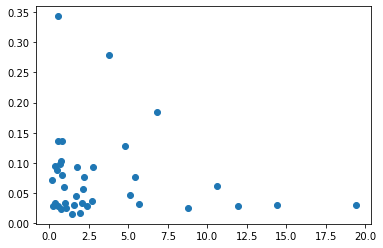

In [44]:
import matplotlib

# plot
matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()

In [45]:
diff = x-y
print(diff.mean())
print(diff.std())

3.325548572970394
4.374638127404863


### DICRI

In [ ]:
tab = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/seleccion/tabulado_imagenes.csv', encoding='utf-8')
del tab['Unnamed: 0']
pd.set_option('display.max_rows', None)
controles = tab[tab['tratamiento'] == 'c']
controles = controles.reset_index(drop=True)

In [ ]:
exps = os.listdir(path + 'jsons/')
experiments = []
for j in range(0,len(exps)):
    for i in range(0,len(controles)):
        if str(controles['experimento'][i]) in exps[j]:
            if str(controles['foto'][i]) in exps[j]:
                experiments.append(exps[j])

In [ ]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
# experiments = os.listdir(path + 'jsons/')
complete_file = pd.DataFrame()
for i in range(0,len (experiments)):
    try:
        experiment = jasonReader(path + 'jsons/' + experiments[i])
        amp_files = slicesParser_amplitudes(experiment).filter(['transient1','transient2'])
        amp_files = amp_files[:][0:33]
        transient_max = []
        for j in range(1,len(amp_files)+1):
            transient_max.append(max(amp_files['transient1'][j],amp_files['transient2'][j]))
        amp_files['transient_max'] = transient_max
        amp_files.loc[len(amp_files)+1] = (amp_files.mean())
        amp_files.loc[len(amp_files)+1] = [amp_files['transient1'][len(amp_files)]*100/amp_files['transient_max'][len(amp_files)],amp_files['transient2'][len(amp_files)]*100/amp_files['transient_max'][len(amp_files)],'']
        amp_files[str(experiments[i])] = list(range(1,len(amp_files)-1))+['promedios']+['porcentaje_max']
        complete_file = pd.concat([complete_file,amp_files], axis=1)
    except ValueError:
        print(experiments[i])

In [ ]:
complete_file.to_excel(path + 'DICRI_controles.xlsx', engine='xlsxwriter')  

### Amplitud de transitorio global vs DI

In [ ]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/'
file_tabulado = pd.read_csv(path + 'tabulado_parceado.csv')
file_tabulado.head() 

In [ ]:
experiment = jasonReader(path + 'jsons/050320c8_analysis_result_8b000.json')
allSlices = experiment['slices']
for i in range(0,len(allSlices)):
    print(allSlices[i]['amplitudes'])

In [ ]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/json_nuevos/whole_cell/'
experiments = os.listdir(path)
df = pd.DataFrame()
for experiment in experiments:
    df = pd.read_csv(path + experiment, sep = '\t', index_col=0).loc['amplitudes']
    for imagen in range(0,len(file_tabulado)):
        cel = file_tabulado['célula'].loc[imagen]
        foto = file_tabulado['foto'].loc[imagen]
        if (cel in experiment) & (foto in experiment):
            print(experiment,df)

#     print (experiment, df)

### ALBUMINA

In [ ]:
# Python code demonstrate creating  
# DataFrame from dict narray / lists  
# By default addresses. 
  
import pandas as pd 
  
# intialise data of lists. 
data = {'BSA':[102, 97, 79], 
        'HSA':[65, 74, 69.5],
        'RabSA':[57, 63.3, 70],
        'RSA':[50, 51, 52],
        'PSA':[45, 48, 55]} 
  
# Create DataFrame 
df = pd.DataFrame(data)
df_mean = df.mean()
df_std = df.std()
# Print the output. 
df_std

In [ ]:
import matplotlib.pyplot as plt

plt.errorbar(df_mean.index, df_mean, yerr=df_std, xerr=None, fmt='o')
plt.ylabel('% convertion', fontdict=None, labelpad=None,loc=None)
plt.savefig('/media/leandro/Volumen1TB/Lean/Albumina/%alb_convertion.png')

In [ ]:
cambios_fq = pd.read_csv('/media/leandro/Volumen1TB/Lean/Albumina/cambios_fq_completos.csv', sep= ' ')

In [ ]:
cambios_fq.loc()